In [1]:
from google.colab import drive
drive.mount("/content/drive") # mount your Google Drive; allow the notebook to access the data in your google drive

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


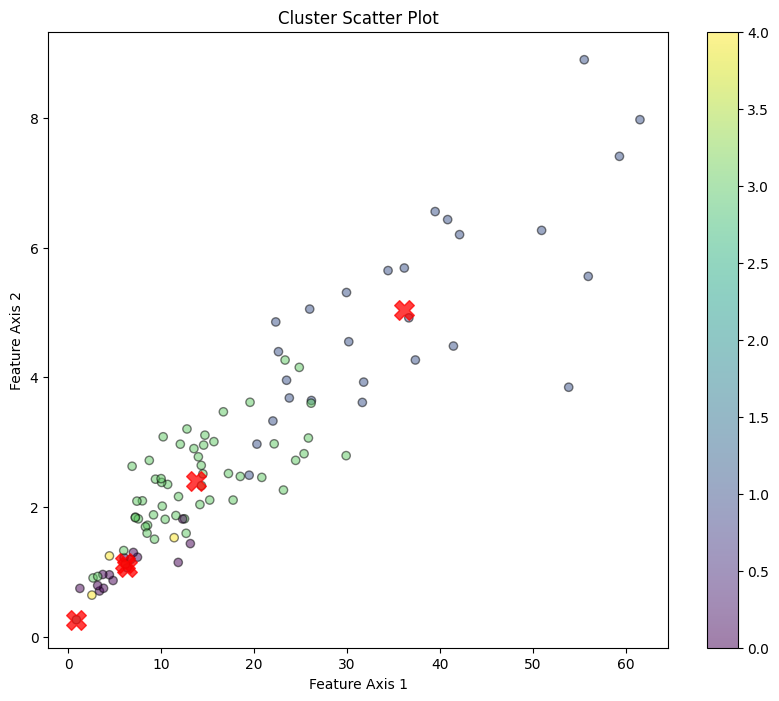

In [2]:
from PIL import Image
import numpy as np
import os
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 图像路径
path = "/content/drive/My Drive/Kmeans/INPUT"
save_path = "/content/drive/My Drive/Kmeans/PUT"
imlist = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.png')]

def get_rgb_hist_feature(image):
    hist_feature = []
    img = np.array(image)  # 使用numpy数组
    color = ('b', 'g', 'r')  # 通道顺序
    for index, value in enumerate(color):
        hist = cv2.calcHist([img], [index], None, [256], [0, 256])
        cv2.normalize(hist, hist, 0, 255, cv2.NORM_MINMAX)
        hist_feature.append(hist)
    return np.array(hist_feature).ravel()

# 初始化特征矩阵
features = np.zeros((len(imlist), 3 * 256))

# 对每张图片进行处理
for i, f in enumerate(imlist):
    im = Image.open(f)
    if im.mode != 'RGB':
        im = im.convert('RGB')
    features[i, :] = get_rgb_hist_feature(im)

# K-means 聚类，分成5个簇
kmeans = KMeans(n_clusters=5)
kmeans.fit(features)
labels = kmeans.labels_

# 创建散点图显示聚类结果
plt.figure(figsize=(10, 8))
scatter = plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', alpha=0.5, edgecolor='k')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')  # 使用大的红色标记表示聚类中心
plt.title('Cluster Scatter Plot')
plt.xlabel('Feature Axis 1')  # 特征轴1
plt.ylabel('Feature Axis 2')  # 特征轴2
plt.colorbar(scatter)
plt.savefig("/content/drive/My Drive/Kmeans/cluster_scatter_plot.png")
plt.show()


In [3]:
# 创建显示聚类结果的图像
for k in range(5):
    cluster_indices = np.where(labels == k)[0]
    n_display = len(cluster_indices)
    cols = 5  # 每行显示5张图片
    rows = (n_display + cols - 1) // cols
    fig, axs = plt.subplots(rows, cols, figsize=(15, rows * 3))
    axs = axs.flatten()
    for idx, img_index in enumerate(cluster_indices):
        img = Image.open(imlist[img_index])
        axs[idx].imshow(img)
        # 在标题中添加聚类索引
        axs[idx].set_title(f'Cluster {k}: {os.path.basename(imlist[img_index])}', fontsize=8)
        axs[idx].axis('off')
    # 隐藏多余的子图位置
    for ax in axs[len(cluster_indices):]:
        ax.axis('off')
    fig.tight_layout()
    # plt.show()
    plt.savefig(f'{save_path}cluster_{k}.png')
    plt.close(fig)  # 关闭图像以节省内存A
